<a href="https://colab.research.google.com/github/sayalidudhane/machinelearning/blob/main/Logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
 import numpy as np
import pandas as pd
%matplotlib inline
 
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [4]:
 df = pd.read_excel('/content/insurance_data.xlsx')
df

,age,insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


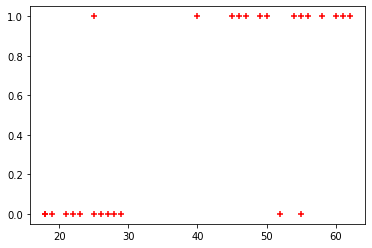

In [5]:
plt.scatter(df.age,df.insurance,marker='+',color='red')

In [24]:
import statsmodels.api as sm
y = df['insurance']
X = sm.add_constant(df[['age']])
mod = sm.Logit(y,X)
result= mod.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.377894
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              insurance   No. Observations:                   27
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            1
Date:                Thu, 19 Nov 2020   Pseudo R-squ.:                  0.4543
Time:                        13:07:52   Log-Likelihood:                -10.203
converged:                       True   LL-Null:                       -18.696
Covariance Type:            nonrobust   LLR p-value:                 3.764e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.2729      1.814     -2.907      0.004      -8.828      -1.718
age            0.1357      0.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.insurance,train_size=0.8)
 
 
X_test

,age
22,40
23,45
16,25
24,50
3,52
14,49


In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [10]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
X_test

,age
22,40
23,45
16,25
24,50
3,52
14,49


In [12]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

array([[0.68654678, 0.31345322],
       [0.43482772, 0.56517228],
       [0.9805952 , 0.0194048 ],
       [0.21275711, 0.78724289],
       [0.15098869, 0.84901131],
       [0.2499002 , 0.7500998 ]])

In [13]:
model.score(X_test,y_test)

0.5

In [14]:
y_predicted

array([0, 1, 0, 1, 1, 1])

In [15]:
X_test

,age
22,40
23,45
16,25
24,50
3,52
14,49


In [16]:
model.coef_

array([[0.20924099]])

In [18]:
model.intercept_

array([-9.15366366])

In [19]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [21]:
def prediction_function(age):
    z = 0.042 * age - 1.53 # 0.04150133 ~ 0.042 and -1.52726963 ~ -1.53
    y = sigmoid(z)
    return y

In [22]:
age = 35
prediction_function(age)

0.4850044983805899

In [23]:
age = 43
prediction_function(age)

0.568565299077705